Submission Untuk Kelas Dicoding : Machine Learning Untuk Pemula
Nama :  Rafilianza
email : dhiazrafilianza@gmail.com

In [2]:
%tensorflow_version 2.x                 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-02 14:45:33--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  33.8MB/s    in 9.9s    

2020-11-02 14:45:43 (31.2 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
from sklearn.model_selection import train_test_split
import zipfile,os,shutil

#ekstrak dataset
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()



In [5]:
#Check Directory
os.listdir('/tmp/rockpaperscissors')

['paper', 'rock', 'README_rpc-cv-images.txt', 'scissors', 'rps-cv-images']

In [6]:
#Delete Selain Rock Paper Scissors

In [7]:

base_dir = '/tmp/rockpaperscissors'
shutil.rmtree(os.path.join(base_dir, 'rps-cv-images'))
os.remove(os.path.join(base_dir, 'README_rpc-cv-images.txt'))

base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [8]:
#Check Directory
os.listdir('/tmp/rockpaperscissors')

['paper', 'rock', 'scissors']

# Augmentasi

In [9]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# Mmemuat datagen yang dapat men transform image
DataGen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    #width_shift_range=0.25,
    #height_shift_range=0.25,
    shear_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip = True,
    fill_mode='nearest',
    validation_split = 0.4
)



In [10]:
#Membuat data generator

train_generator = DataGen.flow_from_directory(
    base_dir,
    target_size = (100,100),
    class_mode='categorical',
    subset = 'training'
)

test_generator = DataGen.flow_from_directory(
    base_dir,
    target_size = (100,100),
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# Pembuatan Model

In [11]:
from tensorflow.keras import datasets, layers, models

ConvNeuNet = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3),padding = 'same'), #32 Filter dengan ukuran 3x3, Agar ukuran tidak mengecil selama konvolusi , maka gunakan padding
  tf.keras.layers.MaxPooling2D(2,2),                                                                 # Karena Max Pooling 2x2 , maka data akan mengecil 2kali lipat         
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu',padding = 'same'),                             #64 Filter dengan ukuran 3x3, Agar ukuran tidak mengecil selama konvolusi , maka gunakan padding
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu',padding = 'same'),                            #128 Filter dengan ukuran 3x3, Agar ukuran tidak mengecil selama konvolusi , maka gunakan padding
  tf.keras.layers.MaxPooling2D(2,2),
  #tf.keras.layers.Conv2D(128,(3,3), activation= 'relu',padding = 'same'),                            #128 Filter dengan ukuran 3x3, Agar ukuran tidak mengecil selama konvolusi , maka gunakan padding
  #tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation= 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation= 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])
ConvNeuNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0

In [12]:
ConvNeuNet.compile(loss = 'categorical_crossentropy' ,optimizer='RMSprop',metrics=['accuracy'])

Adding the Callbacks

In [13]:
#Membuat Custom Callback dimana akan memberhentikan training jika val_accuracy >0.96
class Threshold_Callback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(Threshold_Callback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True

my_callback = Threshold_Callback(threshold=0.96)

In [14]:
history = ConvNeuNet.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=35, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=test_generator, # menampilkan akurasi pengujian data validasi
      verbose=1,
      callbacks = my_callback)

Epoch 1/35
25/25 [==============================] - 26s 1s/step - loss: 1.1137 - accuracy: 0.3584 - val_loss: 1.0933 - val_accuracy: 0.3318
Epoch 2/35
25/25 [==============================] - 26s 1s/step - loss: 1.1013 - accuracy: 0.3429 - val_loss: 1.0705 - val_accuracy: 0.5126
Epoch 3/35
25/25 [==============================] - 27s 1s/step - loss: 1.0455 - accuracy: 0.4883 - val_loss: 0.9003 - val_accuracy: 0.7208
Epoch 4/35
25/25 [==============================] - 26s 1s/step - loss: 0.8131 - accuracy: 0.6584 - val_loss: 0.6262 - val_accuracy: 0.7849
Epoch 5/35
25/25 [==============================] - 27s 1s/step - loss: 0.5919 - accuracy: 0.7663 - val_loss: 0.4208 - val_accuracy: 0.8524
Epoch 6/35
25/25 [==============================] - 26s 1s/step - loss: 0.5084 - accuracy: 0.8000 - val_loss: 0.4002 - val_accuracy: 0.8398
Epoch 7/35
25/25 [==============================] - 27s 1s/step - loss: 0.4998 - accuracy: 0.8037 - val_loss: 0.7159 - val_accuracy: 0.7243
Epoch 8/35
25/25 [==

Saving WhatsApp Image 2020-11-02 at 10.01.13 PM.jpeg to WhatsApp Image 2020-11-02 at 10.01.13 PM.jpeg
WhatsApp Image 2020-11-02 at 10.01.13 PM.jpeg
paper


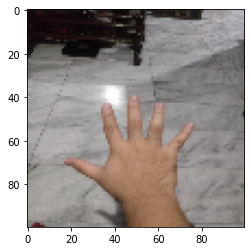

In [17]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = ConvNeuNet.predict(images)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')